## k-means with 2 attribute

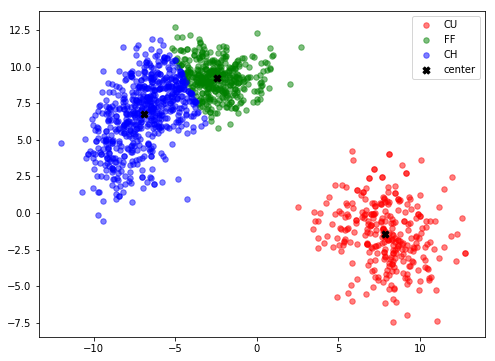

Purity of class CU: 1.0
Purity of class FF: 1.0
Purity of class CH: 0.25552050473186116
Accuracy: 0.7093111279333838


In [330]:
import csv
import math
import random
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import numpy as np
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D


k_cluster = 3
k_cluster_ = ['FF','CU','CH']
attr_num = 2
with open('./data_noah.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    noah_data = []
    select_attr = []
    for row in rows:
        select_attr.append(row['x'])
        select_attr.append(row['y'])
        select_attr.append(row['pitch_type'])
        noah_data.append(select_attr)
        select_attr = []
    noah_data_ = np.array(noah_data)

    new_cluster_center = [[0,0,''],
                          [0,0,''],
                          [0,0,'']]


    cluster_center = random.sample(noah_data, 3)

    flag = 0
    while((new_cluster_center[0]!=cluster_center[0]) or (new_cluster_center[1]!=cluster_center[1]) or (new_cluster_center[2]!=cluster_center[2])):
        if(flag == 0):
            flag = 1
        else:
            cluster_center[0] = new_cluster_center[0]
            cluster_center[1] = new_cluster_center[1]
            cluster_center[2] = new_cluster_center[2]

        cluster = [[],[],[]]
        cluster_cnt = [[0,0,0],
                      [0,0,0],
                      [0,0,0]]
        #found cluster for each data
        for row in noah_data:
            min = 999999
            index = 0
            cluster_index = -1
            for i in range(k_cluster):
                center = cluster_center[i]
                square_sum = 0.0
                for j in range(attr_num):
                    dist = float(row[j]) - float(center[j])
                    square_sum += dist*dist
                hypot =  math.sqrt(square_sum)
                if(hypot< min):
                    min = hypot
                    cluster_index = i
        
            cluster[cluster_index].append(row)
            if row[len(row)-1] == 'FF' :
                cluster_cnt[cluster_index][0]+=1
            elif row[len(row)-1] == 'CU' :
                cluster_cnt[cluster_index][1]+=1
            elif row[len(row)-1] == 'CH' :
                cluster_cnt[cluster_index][2]+=1

    
        # define the center by calculate center of each axis in each cluster
        for cluster_id in range(k_cluster):
            axis_sum = [0.0,0.0]
            for single_data in cluster[cluster_id]:
                for attr_id in range(attr_num):
                    axis_sum[attr_id] += float(single_data[attr_id])
            for attr_id in range(attr_num):
                new_cluster_center[cluster_id][attr_id] =float(axis_sum[attr_id]/len(cluster[cluster_id])) 

    total_label = ['','','']
    cluster_color = ['red','green','blue']
    
    #format the list to array in order to plot scatter
    for cluster_id in range(k_cluster):    
        cluster[cluster_id] = np.array(cluster[cluster_id])

    # plot the scatter
    fig = plt.figure(figsize=(8,6))
    purity = [0.0,0.0,0.0]
    
    for cluster_id in range(k_cluster):
        purity[cluster_id] = max(cluster_cnt[cluster_id])/sum(cluster_cnt[cluster_id])
        if purity[cluster_id] > 0.9:
            label = k_cluster_[cluster_cnt[cluster_id].index(max(cluster_cnt[cluster_id]))]
        else:
            label = 'CH'
            purity[cluster_id] = 1 - purity[cluster_id]
        total_label[cluster_id] = label
        plt.scatter(cluster[cluster_id][:,0].astype(np.float32),cluster[cluster_id][:,1].astype(np.float32),s=30,c=cluster_color[cluster_id],alpha=0.5,label=label)
    
    cluster_center = np.array(cluster_center)
    plt.scatter(cluster_center[:,0].astype(np.float32),cluster_center[:,1].astype(np.float32),s=50,c='black',marker='X',alpha=1,label='center')
    plt.legend()
    plt.show()


    #compute accuracy
    score = 0
    for row in noah_data:
        min = 999999
        index = 0
        cluster_index = -1
        for i in range(k_cluster):
            center = cluster_center[i]
            square_sum = 0.0
            for j in range(attr_num):
                dist = float(row[j]) - float(center[j])
                square_sum += dist*dist
            hypot =  math.sqrt(square_sum)
            if(hypot< min):
                min = hypot
                cluster_index = i   
        if row[len(row)-1]==total_label[cluster_index] :
            score+=1
            
    accuracy = score/len(noah_data)
    print('Purity of class ' + total_label[0] + ': ' +str(purity[0]))
    print('Purity of class ' + total_label[1] + ': ' +str(purity[1]))
    print('Purity of class ' + total_label[2] + ': ' +str(purity[2]))
    print('Accuracy: ' + str(accuracy))






## k-means with 4 attributes

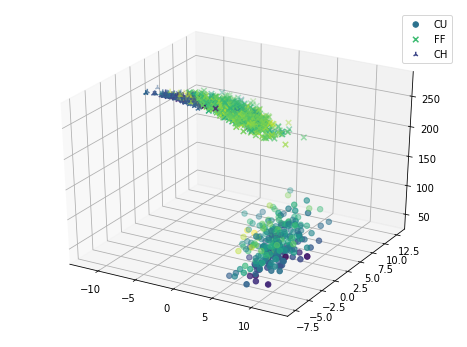

Purity of class CU: 1.0
Purity of class FF: 0.9820574162679426
Purity of class CH: 0.7989130434782609
Accuracy: 0.9167297501892505


In [285]:
import csv
import math
import random
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import numpy as np
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D


k_cluster = 3
k_cluster_ = ['FF','CU','CH']
attr_num = 4
with open('./data_noah.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    noah_data = []
    select_attr = []
    for row in rows:
        select_attr.append(row['x'])
        select_attr.append(row['y'])
        select_attr.append(row['speed'])
        select_attr.append(row['spin'])
        select_attr.append(row['pitch_type'])
        noah_data.append(select_attr)
        select_attr = []
    noah_data_ = np.array(noah_data)


    new_cluster_center = [[0,0,0,0,''],
                          [0,0,0,0,''],
                          [0,0,0,0,'']]

    cluster_center = random.sample(noah_data, 3)

    flag = 0
  
    while((new_cluster_center[0]!=cluster_center[0]) or (new_cluster_center[1]!=cluster_center[1]) or (new_cluster_center[2]!=cluster_center[2])):
        if(flag == 0):
            flag = 1
        else:
            cluster_center[0] = new_cluster_center[0]
            cluster_center[1] = new_cluster_center[1]
            cluster_center[2] = new_cluster_center[2]

        cluster = [[],[],[]]
        cluster_cnt = [[0,0,0],
                      [0,0,0],
                      [0,0,0]]
        #found cluster for each data
        for row in noah_data:
            min = 999999
            index = 0
            cluster_index = -1
            for i in range(k_cluster):
                center = cluster_center[i]
                square_sum = 0.0
                for j in range(attr_num):
                    dist = float(row[j]) - float(center[j])
                    square_sum += dist*dist
                hypot =  math.sqrt(square_sum)
                if(hypot< min):
                    min = hypot
                    cluster_index = i
        
            cluster[cluster_index].append(row)
            if row[len(row)-1] == 'FF' :
                cluster_cnt[cluster_index][0]+=1
            elif row[len(row)-1] == 'CU' :
                cluster_cnt[cluster_index][1]+=1
            elif row[len(row)-1] == 'CH' :
                cluster_cnt[cluster_index][2]+=1

    
    # define the center by calculate center of each axis in each cluster
    
        for cluster_id in range(k_cluster):
            axis_sum = [0.0,0.0,0.0,0.0]
            for single_data in cluster[cluster_id]:
                for attr_id in range(attr_num):
                    axis_sum[attr_id] += float(single_data[attr_id])
            for attr_id in range(attr_num):
                new_cluster_center[cluster_id][attr_id] =float(axis_sum[attr_id]/len(cluster[cluster_id])) 

    total_label = ['','','']
    cluster_marker = ['o','x','2']
    
    #format the list to array in order to plot scatter
    for cluster_id in range(k_cluster):    
        cluster[cluster_id] = np.array(cluster[cluster_id])

    #plot the scatter
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111,projection='3d')
    purity = [0.0,0.0,0.0]
    for cluster_id in range(k_cluster):
        purity[cluster_id] = max(cluster_cnt[cluster_id])/sum(cluster_cnt[cluster_id])
        if purity[cluster_id] > 0.9:
            label = k_cluster_[cluster_cnt[cluster_id].index(max(cluster_cnt[cluster_id]))]
        else:
            label = 'CH'
            purity[cluster_id] = 1 - purity[cluster_id]
        total_label[cluster_id] = label
        sp = ax.scatter(cluster[cluster_id][:,0].astype(np.float32),cluster[cluster_id][:,1].astype(np.float32),cluster[cluster_id][:,3].astype(np.float32), s=30,c=cluster[cluster_id][:,2].astype(np.float32),marker=cluster_marker[cluster_id],label= label)
            
    cluster_center = np.array(cluster_center)
    plt.legend()
    plt.show()


  #compute accuracy
    score = 0
    for row in noah_data:
        min = 999999
        index = 0
        cluster_index = -1
        for i in range(k_cluster):
            center = cluster_center[i]
            square_sum = 0.0
            for j in range(attr_num):
                dist = float(row[j]) - float(center[j])
                square_sum += dist*dist
            hypot =  math.sqrt(square_sum)
            if(hypot< min):
                min = hypot
                cluster_index = i   
        if row[len(row)-1]==total_label[cluster_index] :
            score+=1
            
    accuracy = score/len(noah_data)
    for cluster_id in range(k_cluster):
        print('Purity of class ' + total_label[cluster_id] + ': ' +str(purity[cluster_id]))
    print('Accuracy: ' + str(accuracy))






## k-means with 5 cluster

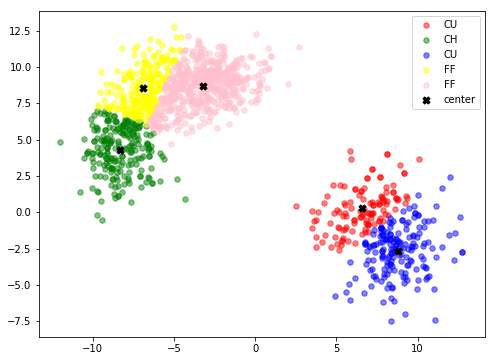

Purity of class CU: 1.0
Purity of class CH: 0.7117117117117117
Purity of class CU: 1.0
Purity of class FF: 0.9919028340080972
Purity of class FF: 0.9963702359346642
Accuracy: 0.9409538228614686


In [224]:
import csv
import math
import random
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import numpy as np
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D


k_cluster = 5
k_cluster_ = ['FF','CU','CH']
attr_num = 2
with open('./data_noah.csv', newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    noah_data = []
    select_attr = []
    for row in rows:
        select_attr.append(row['x'])
        select_attr.append(row['y'])
        select_attr.append(row['pitch_type'])
        noah_data.append(select_attr)
        select_attr = []
    noah_data_ = np.array(noah_data)

    new_cluster_center = [[0,0,''],
                          [0,0,''],
                          [0,0,''],
                          [0,0,''],
                          [0,0,'']]


    cluster_center = random.sample(noah_data, 5)

    flag = 0
    while((new_cluster_center[0]!=cluster_center[0]) or (new_cluster_center[1]!=cluster_center[1]) or (new_cluster_center[2]!=cluster_center[2]) or (new_cluster_center[3]!=cluster_center[3]) or (new_cluster_center[4]!=cluster_center[4])):
        if(flag == 0):
            flag = 1
        else:
            cluster_center[0] = new_cluster_center[0]
            cluster_center[1] = new_cluster_center[1]
            cluster_center[2] = new_cluster_center[2]
            cluster_center[3] = new_cluster_center[3]
            cluster_center[4] = new_cluster_center[4]

        cluster = [[],[],[],[],[]]
        cluster_cnt = [[0,0,0],
                      [0,0,0],
                      [0,0,0],
                      [0,0,0],
                      [0,0,0]]
        #found cluster for each data
        for row in noah_data:
            min = 999999
            index = 0
            cluster_index = -1
            for i in range(k_cluster):
                center = cluster_center[i]
                square_sum = 0.0
                for j in range(attr_num):
                    dist = float(row[j]) - float(center[j])
                    square_sum += dist*dist
                hypot =  math.sqrt(square_sum)
                if(hypot< min):
                    min = hypot
                    cluster_index = i
        
            cluster[cluster_index].append(row)
            if row[len(row)-1] == 'FF' :
                cluster_cnt[cluster_index][0]+=1
            elif row[len(row)-1] == 'CU' :
                cluster_cnt[cluster_index][1]+=1
            elif row[len(row)-1] == 'CH' :
                cluster_cnt[cluster_index][2]+=1

    
    # define the center by calculate center of each axis in each cluster
    
        for cluster_id in range(k_cluster):
            axis_sum = [0.0,0.0]
            for single_data in cluster[cluster_id]:
                for attr_id in range(attr_num):
                    axis_sum[attr_id] += float(single_data[attr_id])
            for attr_id in range(attr_num):
                new_cluster_center[cluster_id][attr_id] =float(axis_sum[attr_id]/len(cluster[cluster_id])) 

    total_label = ['','','','','']
    cluster_color = ['red','green','blue','yellow','pink']
    
    #format the list to array in order to plot scatter
    for cluster_id in range(k_cluster):    
        cluster[cluster_id] = np.array(cluster[cluster_id])

    # plot the scatter
    fig = plt.figure(figsize=(8,6))
    purity = [0.0,0.0,0.0,0.0,0.0]
    for cluster_id in range(k_cluster):
        purity[cluster_id] = max(cluster_cnt[cluster_id])/sum(cluster_cnt[cluster_id])
        label = k_cluster_[cluster_cnt[cluster_id].index(max(cluster_cnt[cluster_id]))]
        total_label[cluster_id] = label
        plt.scatter(cluster[cluster_id][:,0].astype(np.float32),cluster[cluster_id][:,1].astype(np.float32),s=30,c=cluster_color[cluster_id],alpha=0.5,label=label)
    
    cluster_center = np.array(cluster_center)
    plt.scatter(cluster_center[:,0].astype(np.float32),cluster_center[:,1].astype(np.float32),s=50,c='black',marker='X',alpha=1,label='center')
    plt.legend()
    plt.show()


    #compute accuracy
    score = 0
    for row in noah_data:
        min = 999999
        index = 0
        cluster_index = -1
        for i in range(k_cluster):
            center = cluster_center[i]
            square_sum = 0.0
            for j in range(attr_num):
                dist = float(row[j]) - float(center[j])
                square_sum += dist*dist
            hypot =  math.sqrt(square_sum)
            if(hypot< min):
                min = hypot
                cluster_index = i   
        if row[len(row)-1]==total_label[cluster_index] :
            score+=1
            
    accuracy = score/len(noah_data)
    
    for cluster_id in range(k_cluster):
        print('Purity of class ' + total_label[cluster_id] + ': ' +str(purity[cluster_id]))
    print('Accuracy: ' + str(accuracy))




